In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
df = pd.read_csv('netflix_titles.csv')

In [70]:
#Removing rows having no Title specified and filling NAN values
df = df[df['title'].notna()]
df = df.fillna('???')

In [71]:
#Only TV Shows
TV = df[df['type'] == 'TV Show']

In [72]:
#Only Movies
movie = df[df['type'] == 'Movie']

In [73]:
len(df) == len(TV) + len(movie)

True

In [74]:
TV = TV[TV['release_year'] >= 2015].sort_values(by = ['release_year', 'date_added'], ascending = False)
movie = movie[movie['release_year'] >= 2015].sort_values(by = ['release_year', 'date_added'], ascending = False)

## Is Netflix has increasingly focusing on TV rather than movies in recent years.

In [75]:
if len(TV) > len(movie):
    print('Netflix has increasingly focusing on \'TV Show\' rather than \'Movies\' in recent years.')
else:
    print('Netflix has increasingly focusing on \'Movies\' rather than \'TV Shows\' in recent years.')

Netflix has increasingly focusing on 'Movies' rather than 'TV Shows' in recent years.


In [76]:
Count = df[df['release_year'] >= 2015].groupby('type')['type'].count()

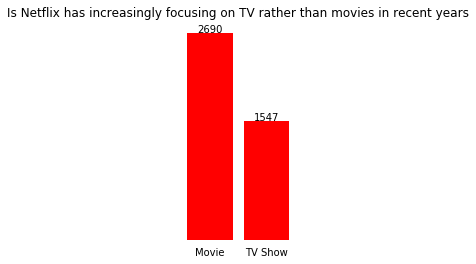

In [66]:
plt.figure(figsize = (2, 4))
bars = plt.bar(Count.index, Count.values, color = 'r')
plt.tick_params(axis = 'both', left = False, bottom = False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelleft = False)

plt.title('Is Netflix has increasingly focusing on TV rather than movies in recent years')

for i in bars:    
      plt.gca().text(i.get_x() + i.get_width()/2, i.get_height() + 10, 
      str(int(i.get_height())), ha = 'center', color = 'k')
plt.show()

## Network analysis of Actors / Directors and find interesting insights

In [8]:
TVorMovie = df[['type', 'director']][df['director'].notna()]
TVorMovie = TVorMovie.pivot_table(index = ['director'], columns = ['type'], aggfunc = len).fillna('...')
TVorMovie

type,Movie,TV Show
director,,
A. L. Vijay,2,...
A. Salaam,1,...
A.R. Murugadoss,3,...
Aadish Keluskar,1,...
Aamir Bashir,1,...
Aamir Khan,1,...
Aanand Rai,2,...
Aaron Burns,1,...
"Aaron Hancox, Michael McNamara",1,...


In [9]:
TVnMovie = TVorMovie[TVorMovie['TV Show'] != '...']
TVnMovie[TVnMovie['Movie'] != '...']

type,Movie,TV Show
director,,
Alessandro Angulo,1,1
Anurag Basu,3,1
Dan Forrer,1,1
Daniel Kontur,1,1
David Ayer,2,1
Eli Roth,1,1
Jay Chandrasekhar,1,1
Jerry Seinfeld,1,1
Justin Webster,1,1


## Types of Ratings

In [10]:
df['rating'].unique().tolist()

['TV-PG',
 'TV-MA',
 'TV-Y7-FV',
 'TV-Y7',
 'TV-14',
 'R',
 'TV-Y',
 'NR',
 'PG-13',
 'TV-G',
 'PG',
 'G',
 nan,
 'UR',
 'NC-17']

In [11]:
ratingCount = df[['type', 'rating']][df['rating'].notna() & df['country'].notna()]
ratingCount = ratingCount.groupby('rating').count()
ratingCount

,type
rating,
G,35
NC-17,2
NR,217
PG,182
PG-13,282
R,507
TV-14,1544
TV-G,134
TV-MA,1892


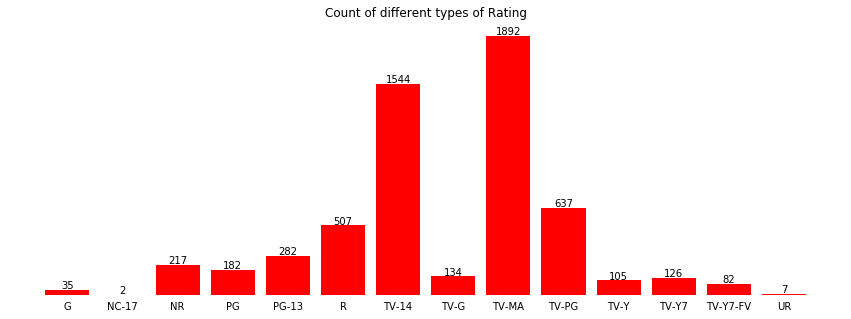

In [12]:
plt.figure(figsize = (15, 5))
bars = plt.bar(ratingCount.index, ratingCount['type'], color = 'r')
plt.tick_params(axis = 'both', left = False, bottom = False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelleft = False)

plt.title('Count of different types of Rating')

for i in bars:    
      plt.gca().text(i.get_x() + i.get_width()/2, i.get_height() + 7, 
      str(int(i.get_height())), ha = 'center', color = 'k')
plt.show()

## US Based Movies and Tv Shows

In [13]:
US_Based = df[['type', 'title', 'country', 'rating']][df['rating'].notna() & df['country'].notna()].copy()
US_Based['country'] = US_Based['country'].str.extract(r'(United States)+')
US_Based.dropna().sort_values(['type','title']).reset_index(drop = True)

,type,title,country,rating
0,Movie,#Rucker50,United States,TV-PG
1,Movie,#realityhigh,United States,TV-14
2,Movie,(T)ERROR,United States,NR
3,Movie,1 Chance 2 Dance,United States,TV-PG
4,Movie,1 Mile to You,United States,TV-14
5,Movie,"10,000 B.C.",United States,PG-13
6,Movie,100 Things to do Before High School,United States,TV-G
7,Movie,100 Years: One Woman's Fight for Justice,United States,TV-14
8,Movie,12 ROUND GUN,United States,TV-MA
9,Movie,13 Cameras,United States,NR


## Movie and Tv Show count Release Every Year

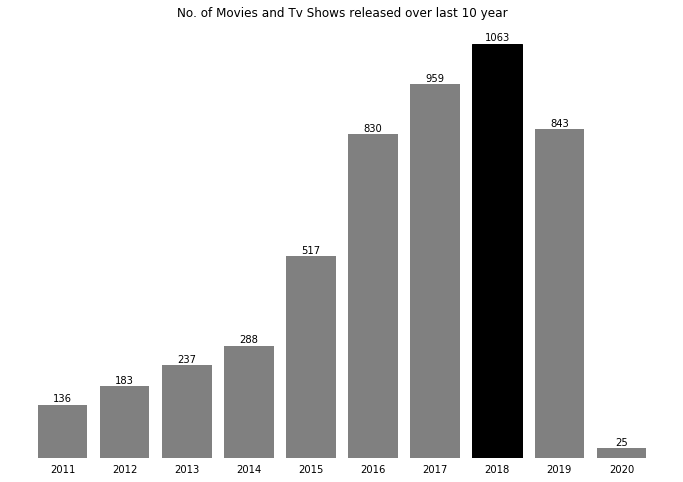

In [14]:
yearCount = df[df['release_year'] > 2010]
yearCount = yearCount.groupby('release_year')['release_year'].apply(len)

plt.figure(figsize = (12, 8))
bars = plt.bar(yearCount.index.tolist(), yearCount.values.tolist(), color = 'grey')

plt.tick_params(axis = 'both', left = False, bottom = False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tick_params(labelleft = False)

plt.xticks(yearCount.index.tolist())
plt.title('No. of Movies and Tv Shows released over last 10 year')

bars[7].set_color('black')
for i in bars:    
      plt.gca().text(i.get_x() + i.get_width()/2, i.get_height() + 7, 
      str(int(i.get_height())), ha = 'center', color = 'k')

plt.show()